# Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:

1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты


Требуется выполнить следующее задание:

1. Загрузите файл HR.csv в pandas dataframe
2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки
10. Загрузить jupyter notebook с решением на github и прислать ссылку

# Решение

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите файл HR.csv в pandas dataframe (5 баллов)

In [2]:
hr = pd.read_csv('HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение) (10 баллов)

Одним движением рассчитаем среднее, медиану (50% квартиль), минимум, максимум

In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# список числовых столбцов:
col_list = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'left',
    'promotion_last_5years'
]

In [6]:
# рассчитаем моды:
print('Моды:\n')
for i in col_list:
    print(i, ' -- ', hr[i].mode()[0])


Моды:

satisfaction_level  --  0.1
last_evaluation  --  0.55
number_project  --  4
average_montly_hours  --  135
time_spend_company  --  3
Work_accident  --  0
left  --  0
promotion_last_5years  --  0


In [7]:
# СКО
print('СКО:\n')
for i in col_list:
    print(i, ' -- ', np.std(hr[i], ddof=1))

СКО:

satisfaction_level  --  0.2486306510611418
last_evaluation  --  0.17116911062327592
number_project  --  1.2325923553183857
average_montly_hours  --  49.943099371284305
time_spend_company  --  1.4601362305354546
Work_accident  --  0.3517185523801279
left  --  0.425924099380363
promotion_last_5years  --  0.1442814645785774


### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные (10 баллов).

In [14]:
# рассчитаем корреляционную матрицу для количественных переменных. Не количественные переменные автоматически не попали в расчёт.
correlation_matrix = hr.corr(method="pearson")
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [51]:
def get_most_less_correlated(correlation_matrix):
    '''
    Функция возвращает две пары переменных и значение корреляции, одна пара из которых
    имеет наибольшее по модулю значение коррекляции, другая - наименьшее по модулю значение корреляции.
    Ответ возвращается в словаре с ключами "min" и "max" для наименьшего и наибольшего значений соответственно.
    По ключу возвращается кортеж с тремя значениями: первая переменная, вторая переменная, значение коэффициента корреляции.
    '''
    abs_max = 0 #текущее значение максимума в абсолютном выражении
    abs_min = 1 #текущее значение минимума в абсолютном выражении
    answer = {} # словарь для сохранения ответа

    for column in range(correlation_matrix.shape[0]-1):
        for row in range(column+1,correlation_matrix.shape[1]):
            abs_value = abs(correlation_matrix.iloc[row,column]) #текущее абсолютное значение ячейки датафрейма
            if abs_value > abs_max:
                abs_max = abs_value
                answer['max'] = (correlation_matrix.index[row],correlation_matrix.columns[column],correlation_matrix.iloc[row,column])
            if abs_value < abs_min:
                abs_min = abs_value
                answer['min'] = (correlation_matrix.index[row],correlation_matrix.columns[column],correlation_matrix.iloc[row,column])
    return answer

In [52]:
get_most_less_correlated(correlation_matrix)

{'max': ('average_montly_hours', 'number_project', 0.41721063440177986),
 'min': ('Work_accident', 'time_spend_company', 0.0021204180967097077)}

Таким образом,
1. **Наиболее** скоррелированные между собой переменные - это **'average_montly_hours' и 'number_project'** со значением коэффициента 0,41.
2. **Наименее** скоррелированные между собой переменные - это **'Work_accident', 'time_spend_company'** со значением коэффициента корреляции 0.002

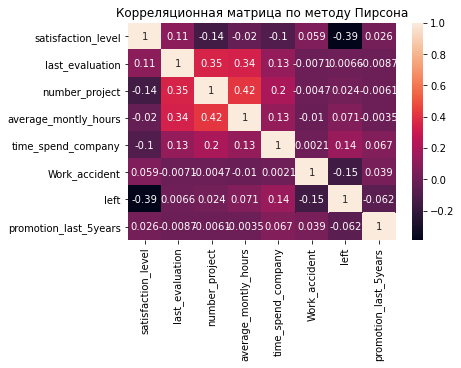

In [54]:
# визуализируем с помощью seaborn heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title("Корреляционная матрица по методу Пирсона")
plt.show()

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте (5 баллов).

In [59]:
hr.groupby('department').count()[['satisfaction_level']].sort_values("satisfaction_level", ascending=False)

,satisfaction_level
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


### 5. Показать распределение сотрудников по зарплатам (5 баллов).

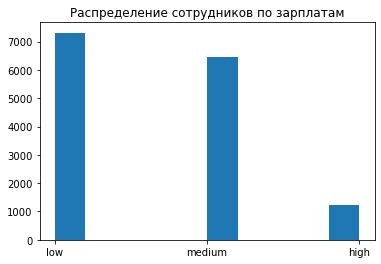

In [60]:
plt.hist(hr["salary"])
plt.title("Распределение сотрудников по зарплатам")
plt.show()

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам по департаментам'}, xlabel='department'>

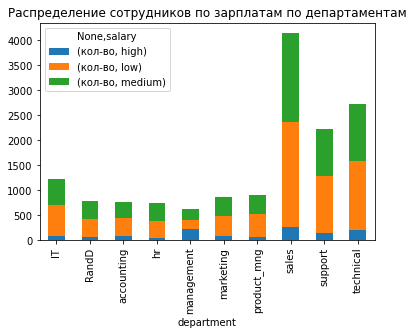

In [72]:
salaries = hr.groupby(["department", "salary"]).count()[["satisfaction_level"]]
salaries.columns = ["кол-во"]
salaries = salaries.unstack(level=-1)
salaries.plot(kind='bar', stacked=True, title="Распределение сотрудников по зарплатам по департаментам")

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом (10 баллов).

Чтобы подтвердить или опровергнуть гипотезу H1, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом,

проверим **Нулевую гипотезу H0**, что сотрудники с высоким и низким окладом проводят на работе одинаковое кол-во времени.
Ввиду того, что **выборки независимые**, можно использовать **критерий Стьюдента**.

Выберем уровень значимости, равный 5%.

In [74]:
alpha = 0.05
high = hr[hr["salary"] == "high"]["average_montly_hours"]
low = hr[hr["salary"] == "low"]["average_montly_hours"]
result = sp.ttest_ind(high, low, equal_var=False)
result.pvalue #выведем сразу значение p-value

0.4459045542257889

Ввиду того, что p-value значительно выше уровня значимости alpha, мы не можем отвергнуть нулевую гипотезу H0.

Следовательно, **с вероятностью 95% сотрудники с высоким окладом проводят на работе столько же времени, сколько и сотрудники с низким окладом.**

### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности) (10 баллов):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [86]:
left = hr[hr["left"] == 1][["satisfaction_level", "number_project", "promotion_last_5years"]] #датафрейм с уволившимися
employed = hr[hr["left"] == 0][["satisfaction_level", "number_project", "promotion_last_5years"]] #датафрейм с не уволившимися

#среди уволенных:
#с повышением за 5 лет
promoted_left = len(left[left["promotion_last_5years"] != 0]) / len(left) 
# средняя степень удовлетворённости
satisfaction_left = left["satisfaction_level"].mean()
# среднее количество проектов
projects_left = left["number_project"].mean() 

#среди работающих:
#с повышением за 5 лет
promoted_employed = len(employed[employed["promotion_last_5years"] != 0]) / len(employed)
# средняя степень удовлетворённости
satisfaction_employed = employed["satisfaction_level"].mean()
# среднее количество проектов
projects_employed = employed["number_project"].mean()

result = pd.DataFrame([
                [promoted_left, promoted_employed],
                [satisfaction_left, satisfaction_employed],
                [projects_left, projects_employed]
            ],
            columns=["уволенные", "работающие"],
            index=["Доля сотрудников с повышением за последние 5 лет", "Средняя степень удовлетворенности", "Среднее количество проектов"]
        )
result

,уволенные,работающие
Доля сотрудников с повышением за последние 5 лет,0.005321,0.026251
Средняя степень удовлетворенности,0.440098,0.666810
Среднее количество проектов,3.855503,3.786664


### 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки (20 баллов).

In [89]:
# получим список численных столбцов без зависимой переменной 'left'
col_list_X = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
]
X = hr[col_list_X]
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [103]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, hr['left'], test_size=0.25)

In [104]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [105]:
# инциализируем модель
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке, запишем прогноз отдельно в массив
y_predict = lda.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7605333333333333

**Точность модели** оказалась на достаточно **высоком уровне** - около 76% за несколько прогонов

### 10. Загрузить jupyter notebook с решением на github и прислать ссылку (5 баллов)